In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yfin
from pandas_datareader import data as pdr

In [26]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator

In [13]:
start='2010-01-01'
end='2023-04-30'

In [21]:
yfin.pdr_override()

spy = pdr.DataReader('AAPL', start=start, end=end)
data=pd.DataFrame(spy)

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412875,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


In [22]:
data = data.reset_index()

In [23]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [24]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412875,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


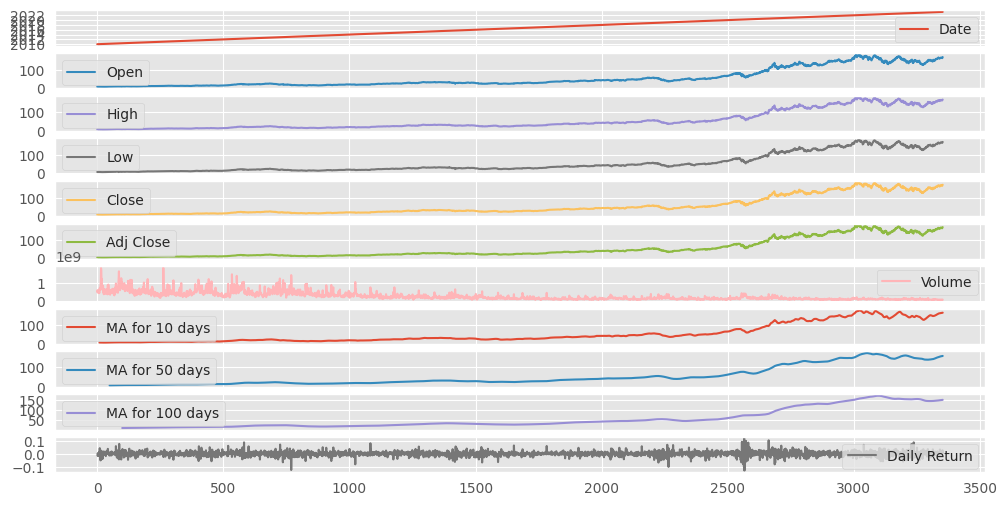

<ipython-input-27-9a77a06bb070>:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').T


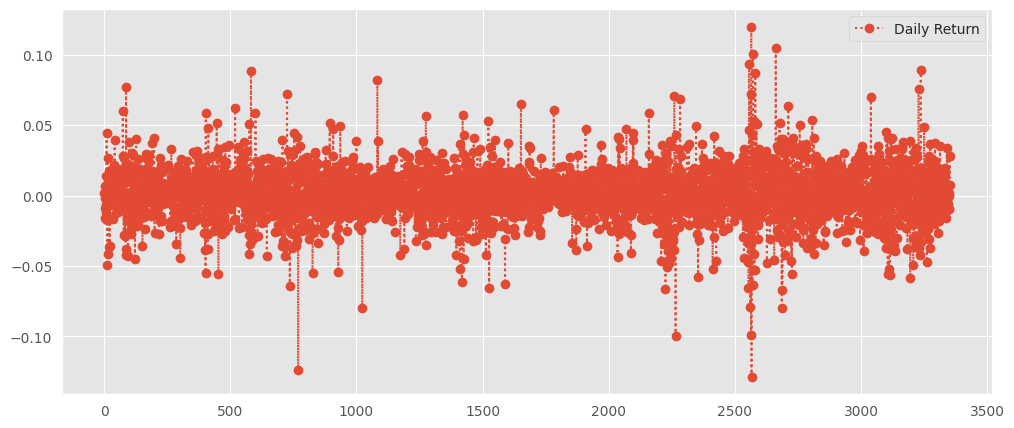

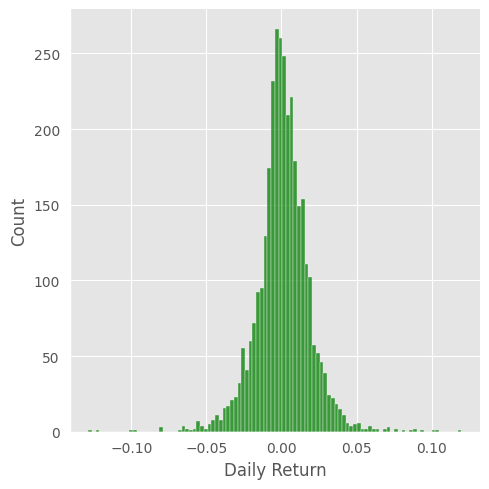

<ipython-input-27-9a77a06bb070>:34: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)


           Date        Open        High         Low       Close   Adj Close  \
0    2010-01-04    7.622500    7.660714    7.585000    7.643214    6.505280   
1    2010-01-05    7.664286    7.699643    7.616071    7.656429    6.516528   
2    2010-01-06    7.656429    7.686786    7.526786    7.534643    6.412875   
3    2010-01-07    7.562500    7.571429    7.466071    7.520714    6.401018   
4    2010-01-08    7.510714    7.571429    7.466429    7.570714    6.443575   
...         ...         ...         ...         ...         ...         ...   
3348 2023-04-24  165.000000  165.600006  163.889999  165.330002  165.330002   
3349 2023-04-25  165.190002  166.309998  163.729996  163.770004  163.770004   
3350 2023-04-26  163.059998  165.279999  162.800003  163.759995  163.759995   
3351 2023-04-27  165.190002  168.559998  165.190002  168.410004  168.410004   
3352 2023-04-28  168.490005  169.850006  167.880005  169.679993  169.679993   

         Volume  MA for 10 days  MA for 50 days  MA

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

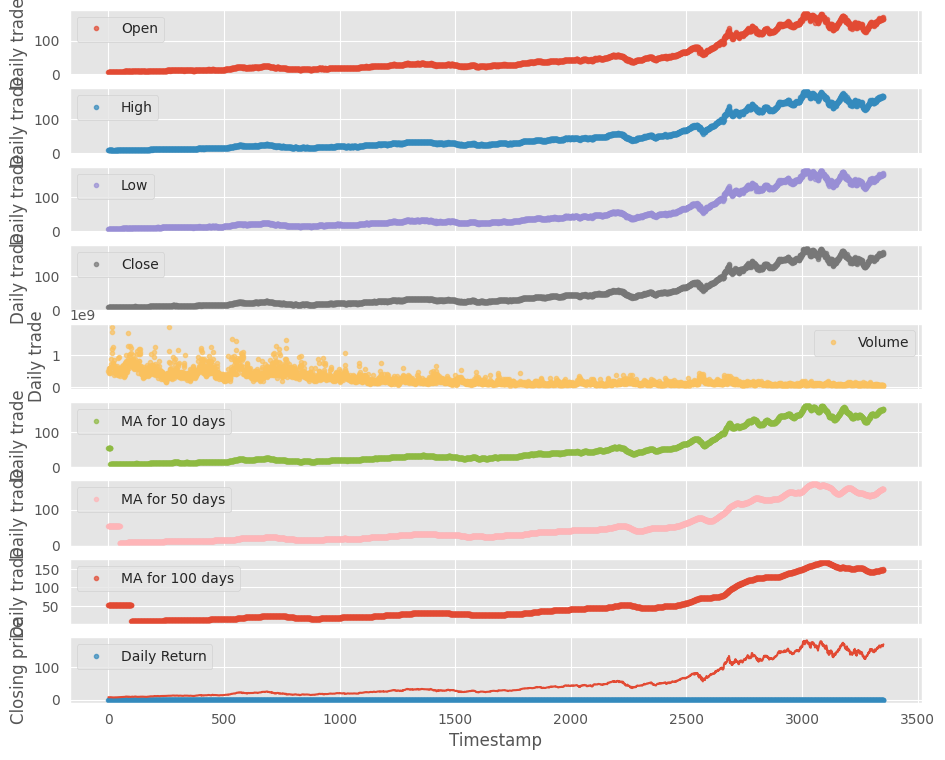

In [27]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

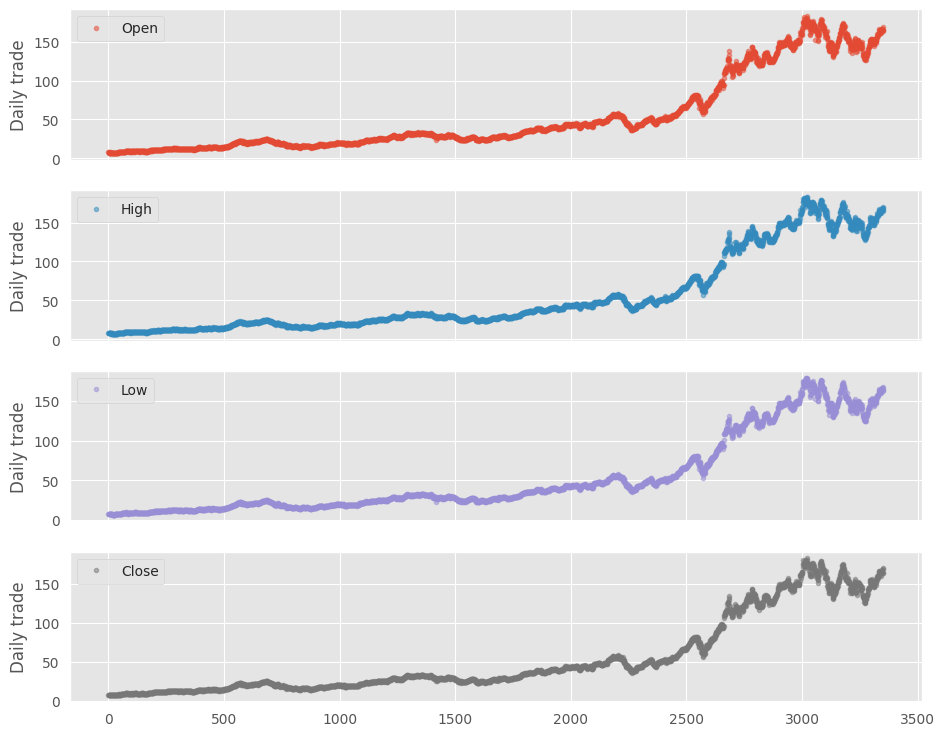

In [28]:

cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

           Date        Open        High         Low       Close   Adj Close  \
0    2010-01-04    7.622500    7.660714    7.585000    7.643214    6.505280   
1    2010-01-05    7.664286    7.699643    7.616071    7.656429    6.516528   
2    2010-01-06    7.656429    7.686786    7.526786    7.534643    6.412875   
3    2010-01-07    7.562500    7.571429    7.466071    7.520714    6.401018   
4    2010-01-08    7.510714    7.571429    7.466429    7.570714    6.443575   
...         ...         ...         ...         ...         ...         ...   
3348 2023-04-24  165.000000  165.600006  163.889999  165.330002  165.330002   
3349 2023-04-25  165.190002  166.309998  163.729996  163.770004  163.770004   
3350 2023-04-26  163.059998  165.279999  162.800003  163.759995  163.759995   
3351 2023-04-27  165.190002  168.559998  165.190002  168.410004  168.410004   
3352 2023-04-28  168.490005  169.850006  167.880005  169.679993  169.679993   

         Volume  MA for 10 days  MA for 50 days  MA

,count,mean,std,min,25%,50%,75%,max
Open,3353.0,5.370708e+01,4.922855e+01,6.870357e+00,1.919429e+01,3.110000e+01,6.639500e+01,1.826300e+02
High,3353.0,5.431131e+01,4.986400e+01,7.000000e+00,1.933929e+01,3.123750e+01,6.700000e+01,1.829400e+02
Low,3353.0,5.312648e+01,4.864129e+01,6.794643e+00,1.900000e+01,3.065000e+01,6.575000e+01,1.791200e+02
Close,3353.0,5.374499e+01,4.928468e+01,6.858929e+00,1.914607e+01,3.106250e+01,6.657250e+01,1.820100e+02
Adj Close,3353.0,5.186294e+01,4.974384e+01,5.837760e+00,1.677920e+01,2.817041e+01,6.522078e+01,1.806839e+02
Volume,3353.0,2.516429e+08,2.218363e+08,3.519590e+07,9.884470e+07,1.626192e+08,3.384644e+08,1.880998e+09
MA for 10 days,3353.0,5.365542e+01,4.905123e+01,6.976750e+00,1.915589e+01,3.133450e+01,6.609750e+01,1.783320e+02
MA for 50 days,3353.0,5.328844e+01,4.808819e+01,7.391336e+00,1.944454e+01,3.149030e+01,6.599190e+01,1.726638e+02
MA for 100 days,3353.0,5.290474e+01,4.708287e+01,8.091171e+00,1.966543e+01,3.135812e+01,6.010632e+01,1.694848e+02
Daily Return,3353.0,1.087834e-03,1.802368e-02,-1.286470e-01,-7.625454e-03,8.969278e-04,1.064883e-02,1.198083e-01


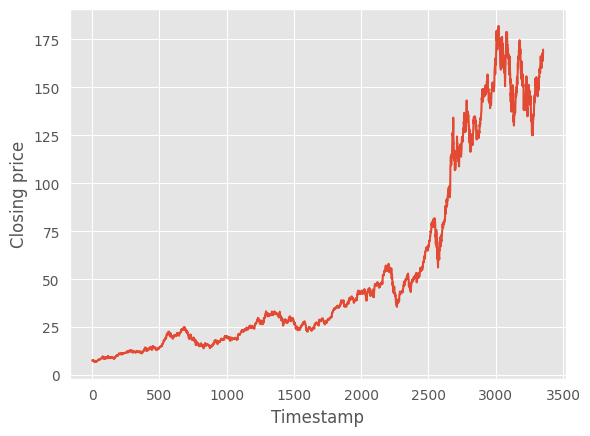

In [29]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [30]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2600
651


In [31]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
65/65 [==============================] - 16s 97ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0827 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0583
Epoch 2/40
65/65 [==============================] - 4s 56ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0587 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0496
Epoch 3/40
65/65 [==============================] - 3s 39ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0533 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0459
Epoch 4/40
65/65 [==============================] - 3s 41ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0503 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0519
Epoch 5/40
65/65 [==============================] - 3s 41ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0476 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0459
Epoch 6/40
65/65 [==============================] - 4s 61ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0471 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0424
Epoch 7/40
65/65 [===

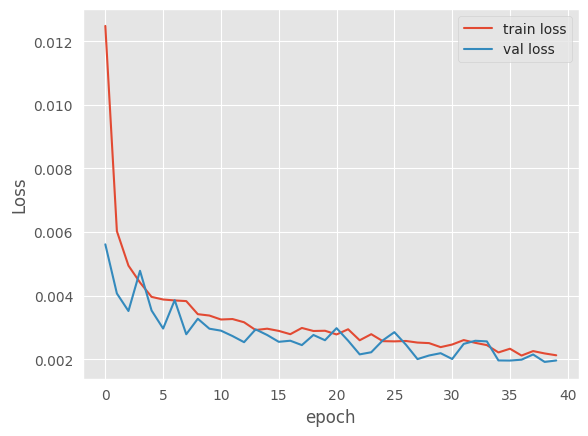

In [32]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

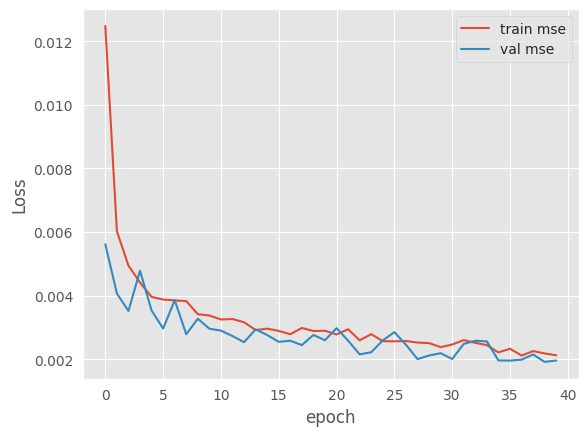

In [33]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

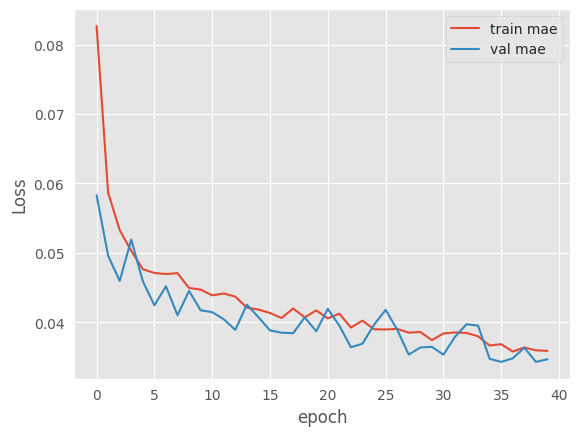

In [34]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

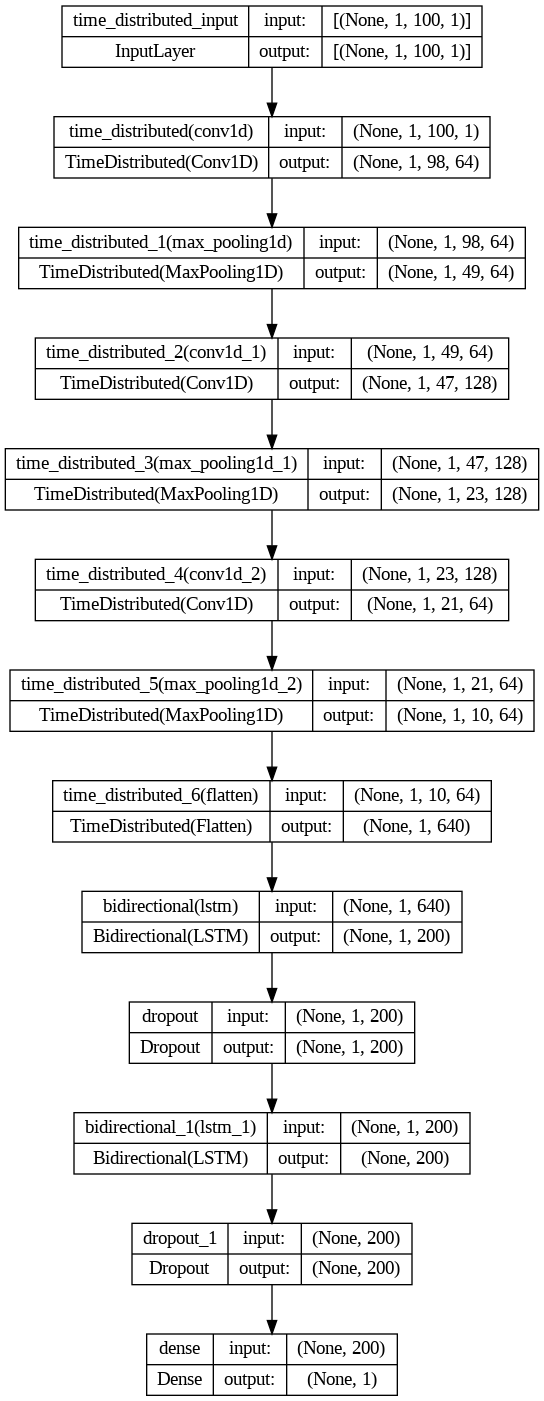

In [35]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [36]:
model.evaluate(test_X, test_Y)

21/21 [==============================] - 0s 11ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0347


[0.0019610601011663675, 0.0019610601011663675, 0.03465994447469711]

In [37]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.943545
R2 Score: 0.943545
Max Error: 0.249799


21/21 [==============================] - 0s 10ms/step


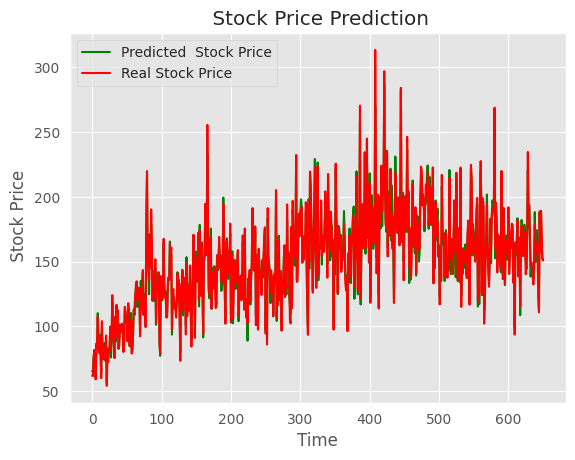

In [38]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [39]:
# First we need to save a model
model.save("model_stock.h5")

In [42]:
# Load model
new_model = tf.keras.models.load_model("/content/model_stock.h5")

In [46]:
yfin.pdr_override()

spy = pdr.DataReader('MSFT', start=start, end=end) #testing on new dataset "microsoft"
data2=pd.DataFrame(spy)

data2.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.623898,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.631529,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.486506,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.242250,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.402546,51197400


In [47]:
data2 = data2.reset_index()

In [49]:

data2.dropna(inplace=True)
data2.head()

data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('Date', axis=1)

print(df2)

X = []
Y = []
window_size=100 # yes
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

<ipython-input-49-65a0484d0a20>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data2.fillna(data.mean(), inplace=True)


            Open        High         Low       Close   Adj Close    Volume
0      30.620001   31.100000   30.590000   30.950001   23.623898  38409100
1      30.850000   31.100000   30.639999   30.959999   23.631529  49749600
2      30.879999   31.080000   30.520000   30.770000   23.486506  58182400
3      30.629999   30.700001   30.190001   30.450001   23.242250  50559700
4      30.280001   30.879999   30.240000   30.660000   23.402546  51197400
...          ...         ...         ...         ...         ...       ...
3348  282.089996  284.950012  278.720001  281.769989  281.769989  26611000
3349  279.510010  281.600006  275.369995  275.420013  275.420013  45772200
3350  296.700012  299.570007  292.730011  295.369995  295.369995  64599200
3351  295.970001  305.200012  295.250000  304.829987  304.829987  46462600
3352  304.010010  308.929993  303.309998  307.260010  307.260010  36446700

[3353 rows x 6 columns]
2600
651


In [50]:
model.evaluate(test_X, test_Y)

21/21 [==============================] - 0s 11ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0425


[0.0028039957396686077, 0.0028039957396686077, 0.04250277206301689]

21/21 [==============================] - 0s 10ms/step


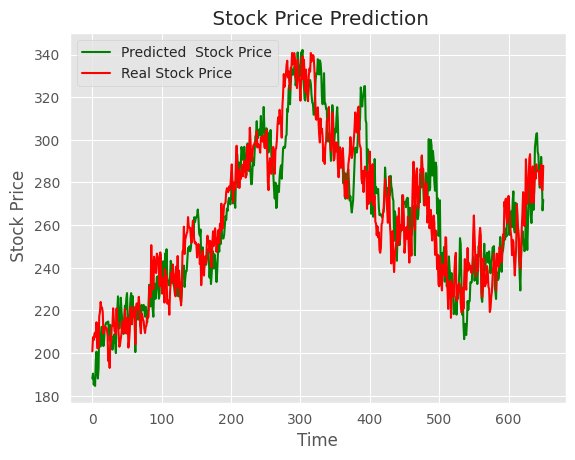

In [51]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()